In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dataframe.csv')
df_all_timestamps = pd.read_csv('dataframe_all_timestamps.csv')

In [497]:
# makes new columns by taking the logarithm of the views, likes, dislikes and comment_count to compress the scale 

import numpy as np
df.loc[:,'log_views'] = np.log10(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log10(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log10(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log10(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

#### DATAFRAME LIST
__df__: (csv file) shows details of trending youtube videos on the last day they were captured trending

__df_all_timestamps__: (csv file) shows details of trending youtube videos every time they were captured trending

__US_trending__: focuses on the trending videos from the United States

__US_channel_counts__: shows the amount of trending videos by every channel

__US_sorted_counts__: sorts US_channel_counts from highest count to lowest

__US_top_10__: uses US_sorted_counts to find all channels with more than 35 trending videos

__avg_view_count__: shows the average of views each channel has on their trending videos
__testing_view_count__: shows the sum of views each channel has on their trending videos

__channel_and_view_counts__: a merge of US_channel_counts and testing_view_count, that shows a channel, the amount of videos they have trending, and the amount of views they have in total

__test_counts__: made to show the counts of channels with more than one trending video and those with only one

__top_channels_all__: shows all the columns from the df dataframe but only for the top 10 US channels

# Trending Creators:
This project focuses on the amount of trending videos each channel in the United States had.

I wanted to know how many channels had multiple trending videos vs. just one. I wanted to know who the top creators were and if it were more likely for them to have more views that the other channels who didn't have as many trending videos.

I focused on the United States for this project, so I made a dataframe, called US_trending for just those creators:

In [597]:
# series with indicies who's country column is compared against my argument 'US', and given a True or False
US_bool = df.country == 'US'

# new dataframe with only US channels
US_trending= df.loc[US_bool]

US_trending.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count
310,o78x918zbFk,2017-11-14,TOTAL FAIL! NATASHA DENONA HOLIDAY WTF,Tati,26,Howto & Style,2017-11-08,18:00:05,"YouTube|""Beauty""|""Makeup""|""Tutorial""|""Review""|...",1277364,56867,2148,25326,https://i.ytimg.com/vi/o78x918zbFk/default.jpg,False,False,False,This was the most UNEXPECTED WTF I've done so ...,US,6.106315,4.754868,3.332236,4.403584
311,6ixU_vdE0Es,2017-11-14,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,Madelaine Petsch,22,People & Blogs,2017-11-08,22:13:18,"madelaine|""madelainepetsch""|""madelaine petsch""...",280065,20289,38,939,https://i.ytimg.com/vi/6ixU_vdE0Es/default.jpg,False,False,False,I asked Travis to replicate my everyday makeup...,US,5.447260,4.307282,1.591065,2.973128
312,wRGldR_SQAA,2017-11-14,Apple Clips sample,Steve Kovach,22,People & Blogs,2017-11-09,18:01:04,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,US,3.354108,0.000000,0.000000,0.000000
313,agKDPntMv-E,2017-11-14,Stephen A. Smith slams the Philadelphia 76ers ...,ESPN,17,Sports,2017-11-08,15:59:06,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,1553,https://i.ytimg.com/vi/agKDPntMv-E/default.jpg,False,False,False,First Take's Stephen A. Smith slams the Philad...,US,5.672275,3.606166,2.634477,3.191451
314,Xl38SuxyrgM,2017-11-14,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...",LetsGoWarriors,17,Sports,2017-11-09,07:27:32,"DubNation|""Golden State Warriors""|""Golden Stat...",16305,147,13,47,https://i.ytimg.com/vi/Xl38SuxyrgM/default.jpg,False,False,False,Previous video: Draymond postgame https://yout...,US,4.212347,2.170262,1.146128,1.681241


From this dataframe, I see that there are 5185 trending videos. Some of these videos have the same creator, some don't. Using US_trending, I wanted to find out the amount of times every distinct channel popped up, to figure out how many different trending videos each channel had. 

In [603]:
# Counts of trending videos per US channel_title
US_channel_counts = US_trending.groupby(['channel_title']).size().reset_index(name='counts')

# Channels with only one trending video
len(US_channel_counts.loc[US_channel_counts['counts'] == 1])

# Channels with more than one trending video
len(US_channel_counts.loc[US_channel_counts['counts'] > 1])

US_channel_counts.head()

,channel_title,counts
0,12 News,1
1,1MILLION Dance Studio,4
2,1theK (원더케이),2
3,20th Century Fox,12
4,2CELLOS,1


I made a new dataframe to show the counts per each different YouTube channel. There are 1897 different channels on the list. 

I was interested to see how many had more than one trending YouTube video, and how many only had one, so I took the length of both options and input their values into a new dataframe to make a pie plot with the data:

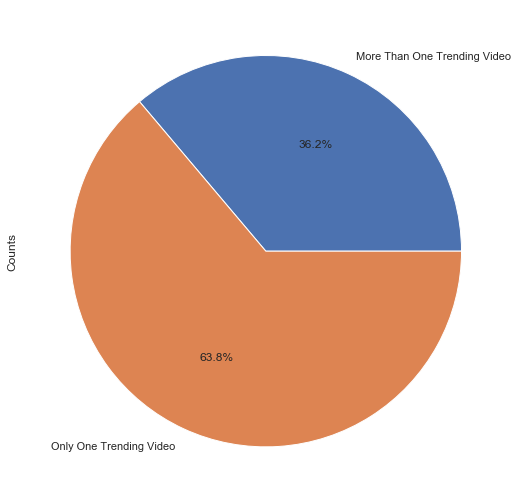

In [600]:
test_counts = pd.DataFrame({'Counts':[len(US_channel_counts.loc[US_channel_counts['counts'] > 1]), 
                                      len(US_channel_counts.loc[US_channel_counts['counts'] == 1])]},
                          index=['More Than One Trending Video', 'Only One Trending Video'])

test_counts.plot.pie(y="Counts", figsize=(9, 9), autopct='%1.1f%%').get_legend().remove()

I made a dataframe that averaged the video views per channel, and made a ascatter plot from that that compares views with the amount of trending videos each channel had. I know from watching YouTube that they will sometimes susggest a video by the same channel to autoplay next, but I also know YouTube will other times suggest a video in the realm of the topic you just watched, and other times, will just suggest you a video that is trending, so I was interested in figure out how a couple of channels have so much more trending videos than others.

In [586]:
'''Average amount of views per channel'''
avg_view_count = US_trending.groupby(['channel_title'])['log_views'].agg('mean').reset_index(name='view_counts')
avg_view_count

,channel_title,view_counts
0,12 News,4.965333
1,1MILLION Dance Studio,5.886668
2,1theK (원더케이),6.514586
3,20th Century Fox,6.289116
4,2CELLOS,5.354719
...,...,...
1892,ТСН,5.256987
1893,圧倒的不審者の極み!,6.131333
1894,杰威爾音樂 JVR Music,7.341586
1895,郭韋辰,4.157487


In [587]:
'''Making my channel view dataframe and my channel count dataframe into one dataframe'''
channel_and_view_counts = pd.merge(US_channel_counts, avg_view_count, on='channel_title', how='inner')
channel_and_view_counts

,channel_title,counts,view_counts
0,12 News,1,4.965333
1,1MILLION Dance Studio,4,5.886668
2,1theK (원더케이),2,6.514586
3,20th Century Fox,12,6.289116
4,2CELLOS,1,5.354719
...,...,...,...
1892,ТСН,1,5.256987
1893,圧倒的不審者の極み!,1,6.131333
1894,杰威爾音樂 JVR Music,1,7.341586
1895,郭韋辰,1,4.157487


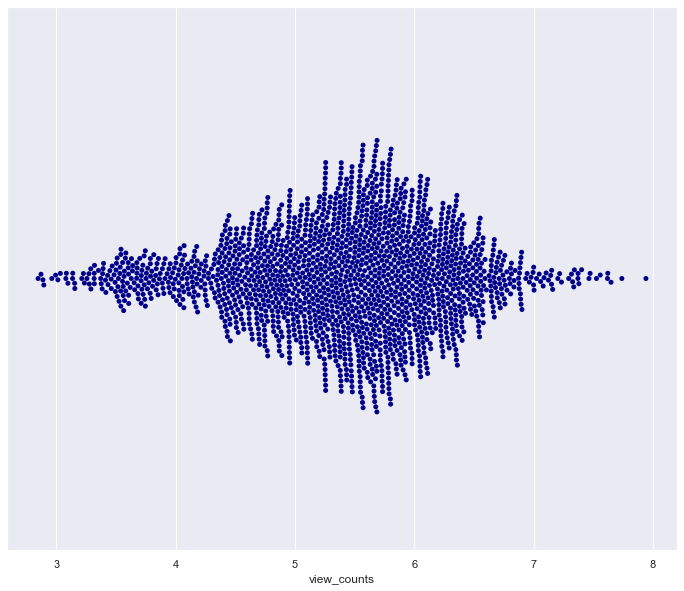

In [743]:
view_swarm = sns.swarmplot(x=channel_and_view_counts["view_counts"], color= "darkblue")

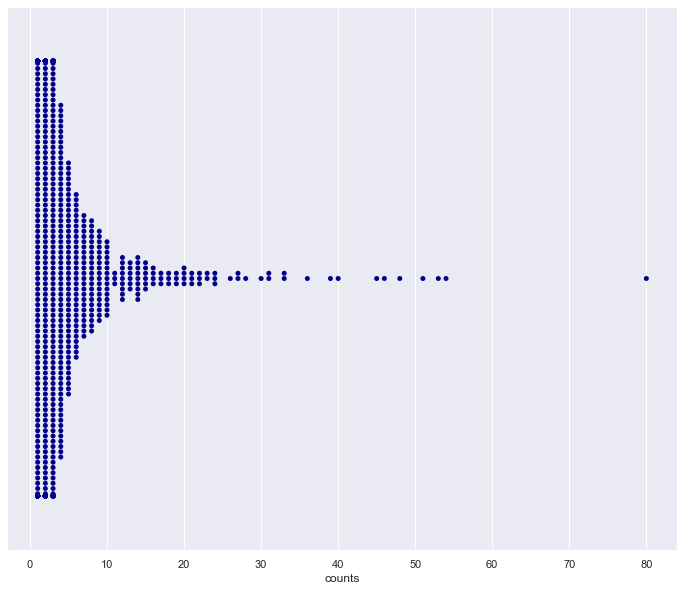

In [738]:
counts_swarm = sns.swarmplot(x=channel_and_view_counts["counts"], color= "darkblue")

Text(0.5, 1.0, 'Average Views vs. Amount of Videos')

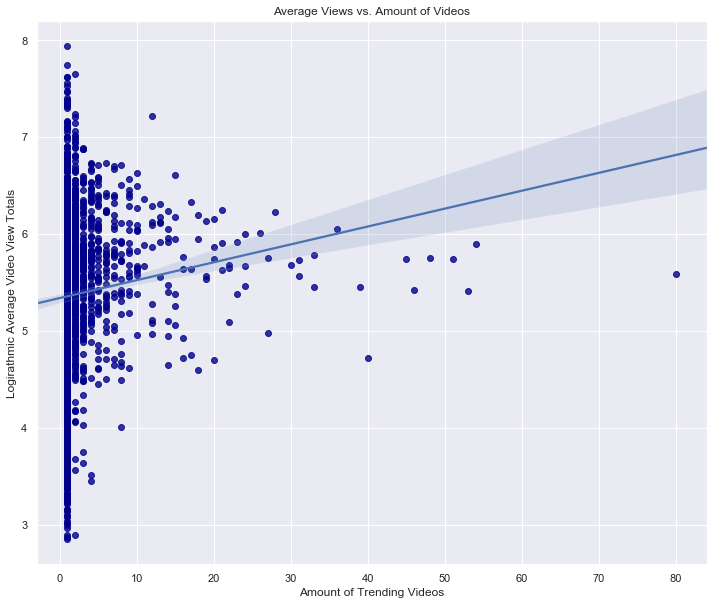

In [742]:
# shows a plot of amount of trending video each channel has by the total view count of their videos

sns.regplot(x = 'counts', y = 'view_counts', data = channel_and_view_counts, scatter_kws={"color":"darkblue"})
plt.xlabel("Amount of Trending Videos")
plt.ylabel("Logirathmic Average Video View Totals")
plt.title("Average Views vs. Amount of Videos")

As for the top creators, with my sorted dataframe, I found out the top 10 trending creators. These ended up being  all the channels that had more than 35 different trending videos.

Text(0.5, 1.0, 'Top 10 Channels')

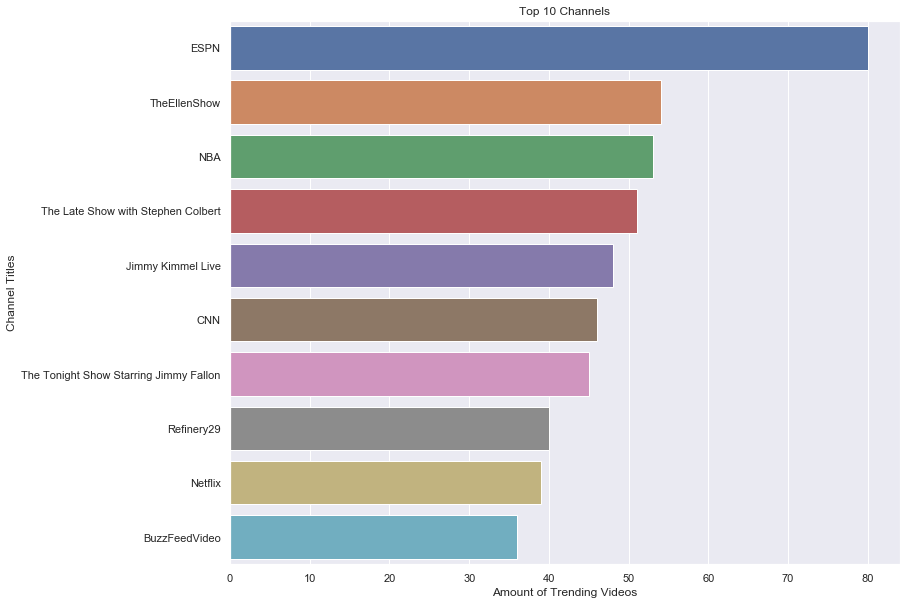

In [741]:
# US channels sorted from highest amount of trending videos to lowest
US_sorted_counts = US_channel_counts.sort_values(by=['counts'], ascending=False)

US_sorted_counts[:10]
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x="counts", y="channel_title", data=US_sorted_counts[:10])
plt.xlabel("Amount of Trending Videos")
plt.ylabel("Channel Titles")
plt.title("Top 10 Channels")

In [628]:
top_channels_all = US_trending.query('channel_title == "ESPN" or channel_title == "TheEllenShow" or channel_title == "NBA" or channel_title == "The Late Show with Stephen Colbert" or channel_title == "Jimmy Kimmel Live" or channel_title == "CNN" or channel_title == "The Tonight Show Starring Jimmy Fallon" or channel_title == "Refinery29" or channel_title == "Netflix" or channel_title == "BuzzFeedVideo"')
top_channels_all

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count
313,agKDPntMv-E,2017-11-14,Stephen A. Smith slams the Philadelphia 76ers ...,ESPN,17,Sports,2017-11-08,15:59:06,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,1553,https://i.ytimg.com/vi/agKDPntMv-E/default.jpg,False,False,False,First Take's Stephen A. Smith slams the Philad...,US,5.672275,3.606166,2.634477,3.191451
675,zy0b9e40tK8,2017-11-14,Dark | Official Trailer [HD] | Netflix,Netflix,24,Entertainment,2017-11-09,09:00:07,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...,US,5.578354,3.751510,2.167317,2.829947
698,yuBqWcSKrCk,2017-11-14,"Owen Wilson on Meeting Julia Roberts, and Tand...",TheEllenShow,24,Entertainment,2017-11-10,14:00:10,"owen wilson|""owen""|""wilson""|""julia roberts""|""t...",304926,3305,130,275,https://i.ytimg.com/vi/yuBqWcSKrCk/default.jpg,False,False,False,"Movie star Owen Wilson was back on the show, a...",US,5.484196,3.519303,2.117271,2.440909
701,k29YnfttqEU,2017-11-14,Mean Tweets – Country Music Edition #3,Jimmy Kimmel Live,23,Comedy,2017-11-09,04:58:04,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",1315873,9312,584,769,https://i.ytimg.com/vi/k29YnfttqEU/default.jpg,False,False,False,"From time to time, we like to shine a light on...",US,6.119214,3.969090,2.767156,2.886491
1783,Rq9-mW6HgQE,2017-11-15,Sean Astin Knew Nothing About 'Lord Of The Rin...,The Late Show with Stephen Colbert,24,Entertainment,2017-11-09,08:35:00,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",908489,12261,339,1600,https://i.ytimg.com/vi/Rq9-mW6HgQE/default.jpg,False,False,False,'Stranger Things' star Sean Astin thought he w...,US,5.958320,4.088561,2.531479,3.204391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169753,VlZ1SWLBfPE,2018-06-14,The Truth About Where Hair Extensions Come Fro...,Refinery29,26,Howto & Style,2018-06-09,15:01:13,"refinery29|""refinery 29""|""r29""|""r29 video""|""vi...",2756607,139611,1415,7439,https://i.ytimg.com/vi/VlZ1SWLBfPE/default.jpg,False,False,False,"This week on Shady, our host, Lexy Lebsack, ta...",US,6.440375,5.144923,3.151063,3.871573
169760,yz7Xq3T0YPs,2018-06-14,"Katherine Langford on 13 Reasons Why, Australi...",Jimmy Kimmel Live,24,Entertainment,2018-06-13,09:00:06,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",296295,8157,294,764,https://i.ytimg.com/vi/yz7Xq3T0YPs/default.jpg,False,False,False,"Katherine talks about learning accents, growin...",US,5.471726,3.911584,2.469822,2.883661
169818,amtC28yfYCM,2018-06-14,Mindy Kaling Is Mad She Wasn't Invited to the ...,The Tonight Show Starring Jimmy Fallon,23,Comedy,2018-05-24,08:00:00,"The Tonight Show|""Jimmy Fallon""|""Mindy Kaling""...",588133,6583,381,486,https://i.ytimg.com/vi/amtC28yfYCM/default.jpg,False,False,False,Mindy Kaling chats with Jimmy about his though...,US,5.769476,3.818490,2.582063,2.687529
169834,5y0owYFTMno,2018-06-14,Ethan Hawke Knows To Seek Knowledge From Masters,The Late Show with Stephen Colbert,24,Entertainment,2018-06-05,07:53:32,"The Late Show|""Late Show""|""Stephen Colbert""|""S...",360432,3899,231,436,https://i.ytimg.com/vi/5y0owYFTMno/default.jpg,False,False,False,'First Reformed' star Ethan Hawke knows to sta...,US,5.556825,3.591065,2.365488,2.640481


Text(0.5, 1.0, 'Average Views of Top 10 Creators')

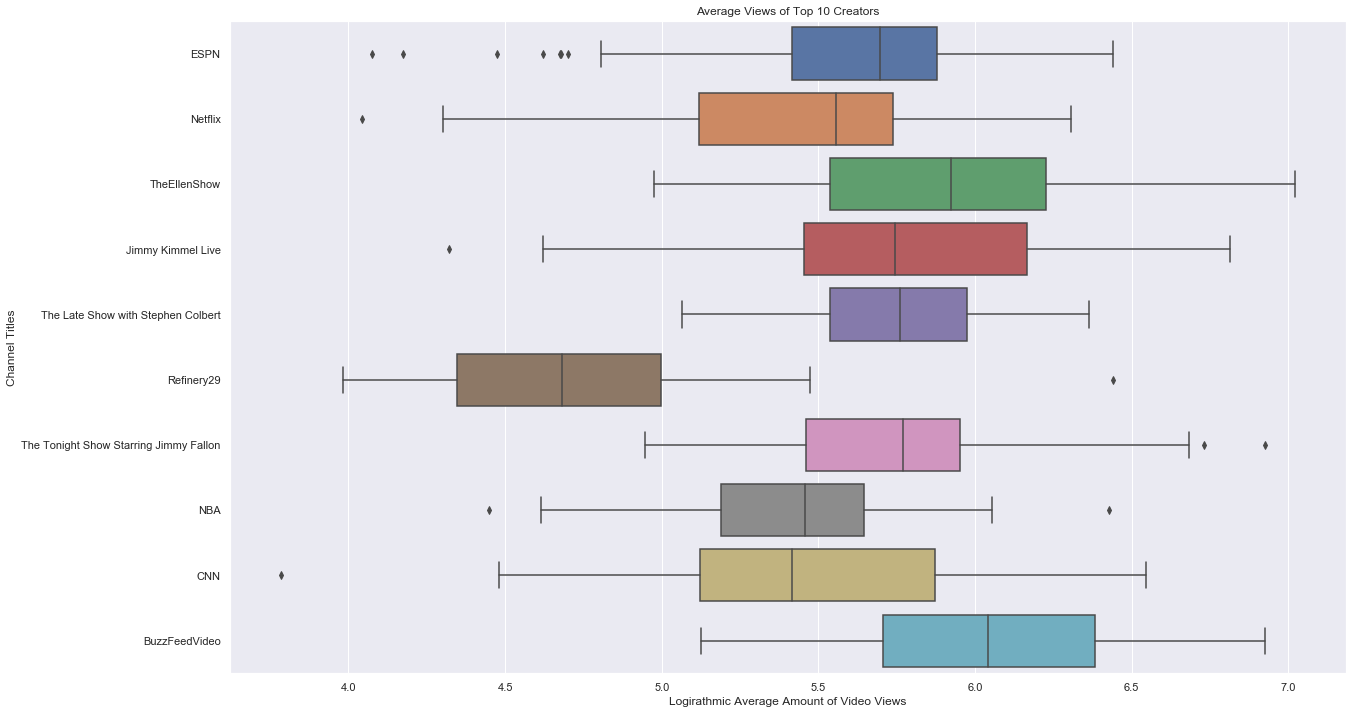

In [731]:
sns.set(rc={'figure.figsize':(20,12)})
n = sns.boxplot(x="log_views", y="channel_title", data=top_channels_all)
plt.xlabel("Logirathmic Average Amount of Video Views")
plt.ylabel("Channel Titles")
plt.title("Average Views of Top 10 Creators")

## What did you learn about your data?

Most of the top 10 creators didn't have content that started on the Internet at all, let alone on YouTube. I would be interested in learning if these channels tend upload more frequently than other YouTube channels, or if they pay more for advertising campaigns than other creators. 

I learned that it doesn't necessarily take millions of views to have a trending video. You don't even necessarily need 10,000.

## What did you learn about data science?

While it is good to have a general hypothesis to start with so you can test your theory, I learned that you have to not hold on to an idea if the data continuously proves otherwise.

## What advice would you give yourself?

* Use as specific descriptions as possible for the names of references to be able to keep up with things.
* Since I'm pretty new to Python, if I am trying to do something, and can't figure out a way of doing it in a specific way, think more about a strategy around it vs. trying to force an exact technique. 

# BONUS STUFF

A dataframe that shows the amount of videos in each category for the channels with the most trending videos:

In [658]:
top_channels_all.groupby(['category']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,category,counts
1,Entertainment,177
5,Sports,133
0,Comedy,58
3,News & Politics,46
4,People & Blogs,43
2,Howto & Style,35


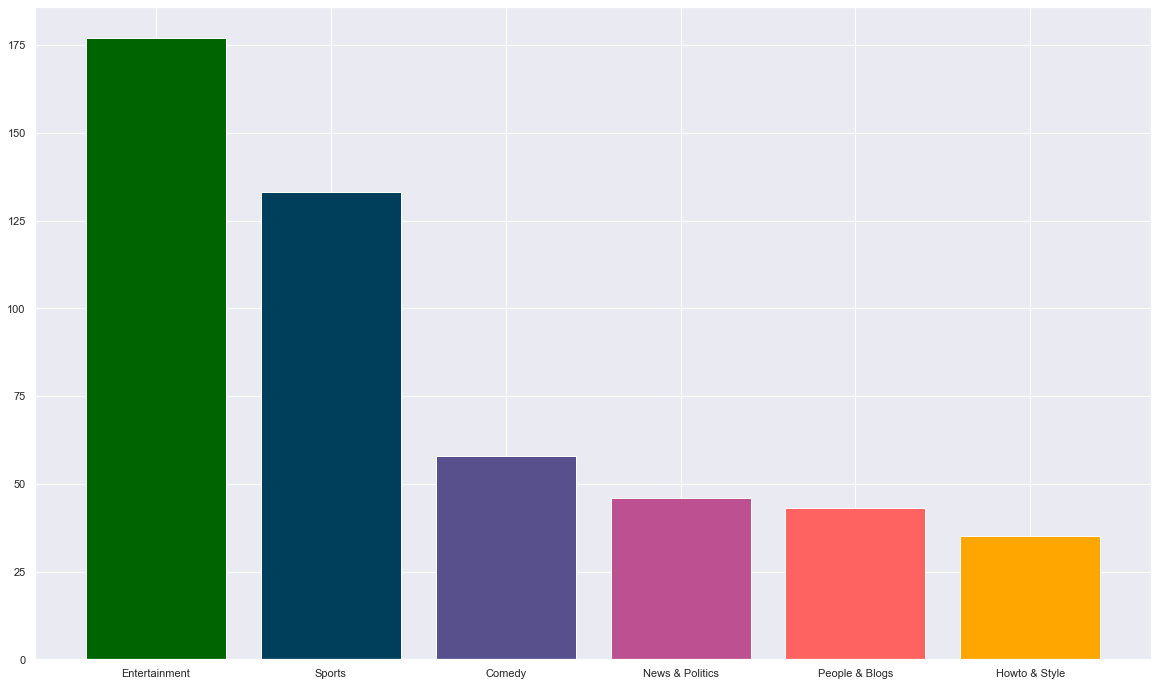

In [725]:
p= plt.bar(x="category", height="counts", color=['darkgreen','#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600'], data=top_channels_all.groupby(['category']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False))

A dataframe that shows the amount of videos in each category for all channels in the US:

In [670]:
US_trending.groupby(['category']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,category,counts
3,Entertainment,1319
6,Howto & Style,523
7,Music,484
8,News & Politics,448
1,Comedy,445
10,People & Blogs,406
14,Sports,397
12,Science & Technology,340
4,Film & Animation,264
2,Education,231


I made this dataframe, using the regular, non-logarthmic views, to compare the average of the highest viewed channels vs the highest viewed channels with the most trending videos:

In [690]:
new_avg_view_count = US_trending.groupby(['channel_title'])['views'].agg('mean').reset_index(name='view_counts').sort_values(by=['view_counts'], ascending=False)
new_avg_view_count

,channel_title,view_counts
942,MalumaVEVO,87264467.0
1339,Selena Gomez,54863912.0
561,FoxStarHindi,44684766.0
390,Daddy Yankee,41803845.0
1549,The Weeknd,41604561.0
...,...,...
1126,OjO Commuter Scooter by OjO Electric,917.0
1097,Newsy,832.5
16,90s Commercials,773.0
1151,Palo Alto Online,745.0
